<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Metode Komputasi Eksplorasi Menggunakan Python
*Oleh Mark Bakker*
## Topik Lanjutan Notebook 5: *Widget* `IPython` Interaktif

Masih dalam topik yang sama seperti Notebook sebelumnya, pada Notebook kali ini kita akan belajar bagaimana membuat sebuah grafik menjadi lebih interaktif dengan menggunakan *widget* `IPython`. *Widget* (pengucapan: ˈwɪdʒɪt') merupakan fasilitas yang disediakan dalam sebuah *user interface* untuk memungkinkan *user* berinteraksi dengan program yang sedang dijalankan. Contohnya, **tombol radio** yang hanya membiarkan *user* menentukan satu pilihan pengaturan dalam satu kategori, **tombol check** di mana *user* dapat membuat beberapa pilihan pengaturan dalam satu kategori, dan **sliders** yang memungkinkan *user* mengubah pengaturan dengan menggeser penanda pada bar yang ditampilkan pada grafik.

Meskipun masih berada dalam tahap eksperimental, *widget* `IPython` memiliki kemampuan yang cukup menarik. Fitur-fitu baru akan ditambahkan ke dalam versi `IPython` terkini di mana dalam waktu bersamaan *upgrade* terus dilakukan terhadap versi yang sama. Notebook yang sedang anda baca ini didesain menggunakan IPython3. Apabila anda masih menggunakan IPython2 pada komputer anda, silakan memperbarui versi IPython yang anda miliki via Anaconda *Launcher* (klik  tombol *update* pada tampilan *launcher* dan pilih versi terbaru). Apabila anda menggunakan komputer yang tersedia di salah satu ruangan komputer maka pilihan Anaconda *Launcher* tidak akan tersedia. Bila anda tidak dapat meng-*update* versi dari `IPython` yang akan anda gunakan, anda perlu mengganti beberapa *syntax* dalam Notebook ini dengan versi yang lebih lama. Perlu diingat bahwa kata kunci `description` juga tidak akan dikenali apabila anda menggunakan `IPython` versi 2 ke bawah. Anda tidak perlu memperbarui versi Python anda untuk mengganti `IPython` yang anda miliki. IPython3 dapat dijalankan menggunakan Python 2.7 (kami tidak menyarankan anda untuk meng-*update* versi Python yang anda miliki menjadi 3.x).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###  Menciptakan sebuah *widget*
Proses yang diperlukan untuk membuat sebuah *widget* pada sebuah grafik sama untuk tiap-tiap *widget* yang berbeda:

1. Tulis sebuah fungsi yang mendeskripsikan grafik yang ingin anda tampilkan.
2. Pastikan bahwa argumen input dari fungsi yang anda buat merupakan variabel yang anda desain untuk dapat diubah-ubah nilainya.
3. Gunakan fungsi `interact` yang tersedia dalam `IPython.html.widgets` untuk menambahkan aspek interaktivitas ke dalam grafik anda.
4. Gunakan *widget* yang anda inginkan sebagai kata kunci dari fungsi `interact` di atas.

### *Slider*
Bayangkan sebuah grafik berbentuk lingkaran. Kita akan menambahkan sebuah *slider* yang dapat digunakan oleh *user* untuk mengubah nilai radius lingkaran tersebut. Hal pertama yang kita lakukan adalah membuat sebuah fungsi yang mendeskripsikan bentuk dari lingkaran, pastikan bahwa variabel radius adalah argumen input yang diperlukan untuk memanggil fungsi tersebut.

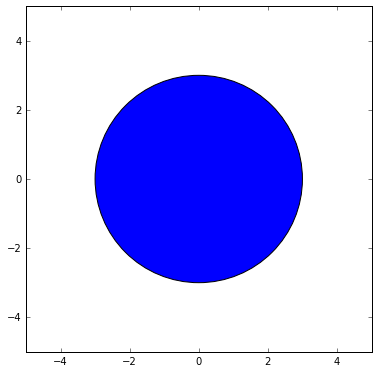

In [2]:
from matplotlib.patches import Circle
def plot_circle(r=1):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_axes([0.4,0.1,0.4,0.8], aspect='equal')
    ax1.set_xlim(-5,5)
    ax1.set_ylim(-5,5)
    c = Circle((0,0),radius=r)
    ax1.add_patch(c)
plot_circle(r=3)

Seperti yang disebutkan di atas, sebuah *slider* yang interaktif dapat diciptakan menggunakan fungsi `interact`. Argumen pertama yang dibutuhkan untuk menggunakan fungsi ini adalah metode yang akan dipanggil oleh fungsi `interact`, dalam contoh ini `plot_circle`, dan argumen kata kunci, dalam contoh ini `r` sebagai radius dari lingkaran (ingat bahwa `r` merupakan argumen pertama dari metode `plot_circle` yang telah kita buat sebelumnya). Nilai maksimum dan minimum dari variabel `r` didefinisikan ke dalam sebuah *tuple*, yang kemudian akan menjadi nilai maksimum dan minimum dari *slider* yang akan dibuat. Apabila anda berhasil memanggil fungsi `interact` dengan benar maka anda dapat mengubah radius lingkaran secara interaktif, di antara nilai maks. dan min., menggunakan *slider* sebagai penunjuk nilai dari variabel `r`. *Slider* akan secara otomatis memasukkan nilai-nilai dari variabel `r` sebagai integer. Perhatikan tanda X abu-abu di pojok kiri atas, apabila tanda X di-klik maka *slider* akan dihilangkan dari tampilan.

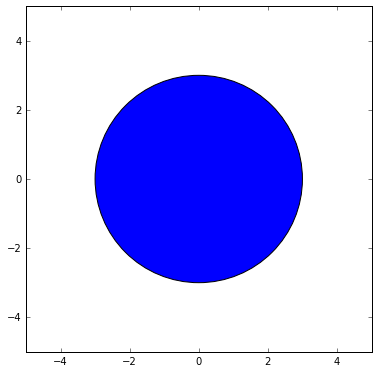

In [3]:
from IPython.html.widgets import interact
interact(plot_circle,r=(1,5)); 

Nilai-nilai dari radius lingkaran yang ditampilkan pada *slider* dapat anda ubah dari *integer* menjadi *float* dengan memastikan bahwa anda setidaknya memasukkan satu nilai bertipe *float* sebagai nilai maksimum atau minimum. Apabila anda juga ingin mengatur jarak antar nilai-nilai radius lingkaran maka anda perlu memasukkan nilai untuk mendefinisikan `step` ke dalam *tuple* tersebut. Contohnya, `r=(1,5,0.5)`, di mana *user* dapat menggunakan *slider* untuk mengubah radius lingkaran dari 1 hingga 5, dengan jarak 0.5 di antara nilai maksimum dan minimum tersebut.

Anda juga dapat membuat beberapa *slider* untuk satu grafik yang sama dengan menggunakan kata kunci yang berbeda-beda. Contohnya, anda dapat membuat sebuah *slider* untuk mengubah posisi dari titik pusat, $x$, dari lingkaran sebagai tambahan dari pilihan untuk mengubah nilai radius. Untuk dapat melakukan hal ini, anda perlu memperbarui fungsi lingkaran yang telah anda buat sebelumnya agar fungsi tersebut juga memerlukan titik pusat sebagai argumen input. Setelah itu, gunakan fungsi `interact` untuk memanggil fungsi lingkaran yang telah anda perbarui menggunakan dua argumen kata kunci.

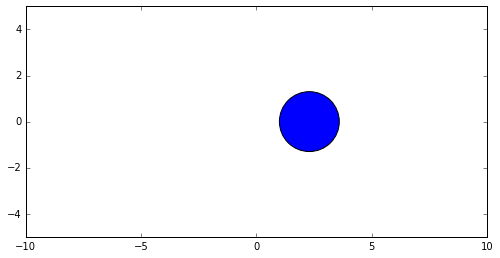

In [4]:
def plot_circle(r=1,x0=0):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_axes([0.4,0.1,0.4,0.8], aspect='equal')
    ax1.set_xlim(-10,10)
    ax1.set_ylim(-5,5)
    c = Circle((x0,0),radius=r)
    ax1.add_patch(c)
    
interact(plot_circle,r=(1.0,5,0.1),x0=(-5.0,5.0,0.1));

### Latihan 1
Muat dokumen `xydata.txt` ke dalam Notebook ini untuk dapat mengakses nilai $x,y$ dari 20 titik data. Buatlah sebuah fungsi untuk membuat plot dari keduapuluh titik data tersebut dan sebuah garis $y=ax+b$ berwarna merah pada satu grafik yang sama, variabel $a$ dan $b$ merupakan argumen input yang diperlukan untuk memanggil fungsi ini. Fungsi yang anda buat juga harus dapat menghitung jumlah total *error* kuadrat, yang merupakan jumlah total dari nilai-nilai kuadrat dari perbedaan antara masing-masing titik data dengan garis merah, dan menampilkan jumlah total *error* kuadrat tersebut sebagai judul dari grafik. Tambahkan dua buah *slider* ke dalam grafik agar *user* dapat mengubah nilai variabel $a$ dan $b$. Gunakan kedua *slider* tersebut untuk menemukan bentuk dari garis merah yang paling optimum untuk merepresentasikan distribusi dari titik-titik data, atau dengan kata lain, coba temukan nilai minimum dari jumlah total *error* kuadrat.

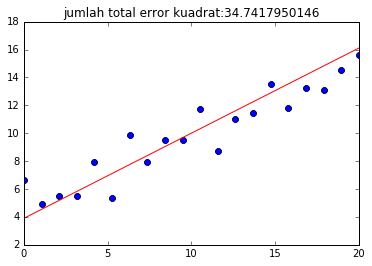

In [6]:
x,y = np.loadtxt('xydata.txt')
def fitline(a,b):
    plt.plot(x,y,'bo')
    yfit = a*x + b
    sum_sq_error = np.sum((y-yfit)**2)
    plt.plot(x,y,'bo')
    plt.plot(x,yfit,'r')
    plt.title('jumlah total error kuadrat:'+str(sum_sq_error))
interact(fitline,a=(0.2,1,0.01),b=(0.0,8));

### *Dropdown*
*Widget dropdown* dapat anda buat dengan menggunakan fungsi `interact` seperti yang anda lakukan di atas dengan memasukkan argumen kata kunci berupa sebuah *list* dari variabel-variabel bertipe *string*. Contohnya, gunakan *widget dropdown* untuk mengubah warna dari lingkaran secara interaktif.

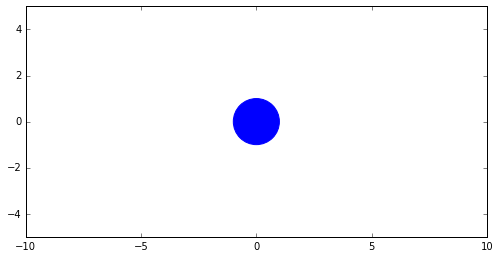

In [9]:
def plot_circle(r=1,x0=0,color='b'):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_axes([0.4,0.1,0.4,0.8], aspect='equal')
    ax1.set_xlim(-10,10)
    ax1.set_ylim(-5,5)
    c = Circle((x0,0),radius=r,color=color)
    ax1.add_patch(c)
    
interact(plot_circle,
         r = (1.0, 5, 0.1),
         x0 = (-5.0, 5.0, 0.1),
         color = ['red','blue','green']);

### Latihan 2
Buatlah sebuah grafik yang menampilkan sebuah elips berwarna dengan titik pusat terletak di $(x,y)=(0,0)$ dengan menggunakan *patch* `Ellipse`. Tambahkan beberapa *slider* untuk mengubah lebar dan tinggi dari elips tersebut (antara 1 - 5), sudut (antara  $-180^\circ$ dan $+180^\circ$), dan sebuah *widget dropdown* untuk mengubah warna dari elips (atur warna:'Aqua','Chocolate', atau 'Fuchsia').

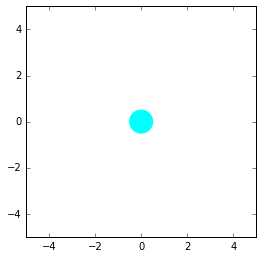

In [10]:
from matplotlib.patches import Ellipse
def plot_ellipse(a=1,b=1,angle=0,color='b'):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_axes([0.4,0.1,0.4,0.8], aspect='equal')
    ax1.set_xlim(-5,5)
    ax1.set_ylim(-5,5)
    e = Ellipse(xy=(0,0),width=a,height=b,angle=angle,color=color)
    ax1.add_patch(e)
interact(plot_ellipse,
         a=(1, 5, 0.1), 
         b=(1, 5, 0.1), 
         angle=(-180, 180),
         color=['Aqua', 'Chocolate', 'Fuchsia']);

### Variasi jenis-jenis *widget*
Terdapat bermacam jenis *widget* yang dapat anda akses untuk membuat grafik anda menjadi lebih interaktif. *Slider* dan *Dropdown* merupakan dua contoh *widget* yang paling mudah untuk dibuat menggunakan fungsi `interact`, di mana anda hanya perlu mendeklarasikan sebuah *tuple* berisi nilai maksimum dan minimum dari argumen input atau sebuah *list* berisi kata-kata. Apabila anda ingin menggunakan *widget-widget* lainnya maka anda perlu mengimpor dan memanggil *widget* tersebut dari paket `IPython.html.widgets`. Daftar dari variasi jenis *widget* yang tersedia dalam `IPython` dapat anda cek [di sini](http://nbviewer.ipython.org/github/datadave/ipython-in-depth/blob/master/notebooks/Interactive%20Widgets/Widget%20List.ipynb)

*Widget-widget* lainnya dapat anda gunakan seperti anda menggunakan *slider* dan *dropdown* pada contoh-contoh soal di atas. Contohnya, *widget* `FloatSlider` dan `Dropdown` dapat anda panggil secara eksplisit untuk menciptakan kembali grafik interaktif dengan lingkaran seperti yang telah anda buat pada Latihan 2 di atas. Perhatikan bahwa terdapat sedikit perbadaan dalam penggunaan *syntax* antara IPython2 dan IPython3.

In [11]:
# IPython2 code (this doesn't work in IPython3)
import IPython.html.widgets as widgets
interact(plot_circle,
         r = widgets.FloatSliderWidget(min = 1, max = 5, step = 0.1, value = 2),
         x0 = widgets.FloatSliderWidget(min = -5, max =  5, step = 0.1, value = 0),
         color = widgets.DropdownWidget(values = ['red','blue','green']) );

AttributeError: FloatSliderWidget

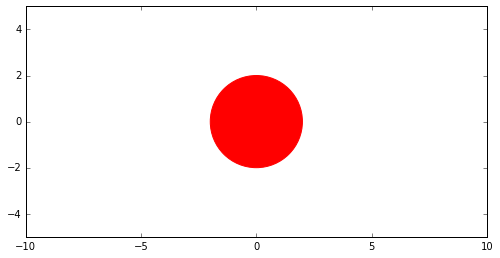

In [12]:
# IPython3 code
import IPython.html.widgets as widgets
interact(plot_circle,
         r = widgets.FloatSlider(min = 1, max = 5, step = 0.1, value = 2),
         x0 = widgets.FloatSlider(min = -5, max =  5, step = 0.1, value = 0),
         color = widgets.Dropdown(options = ['red','blue','green'], description = 'Color:') );

### *Widget Textbox*
Karena *widget text* berfungsi agar *user* dapat memasukkan input berupa teks secara interatif ke dalam sebuah grafik, maka anda  dapat menggunakan *widget* ini untuk memasukkan bentuk teks dari angka. Contohnya, pada contoh soal sebelumnya, gunakan teks sebagai input untuk menggantikan *slider*. Gunakan *widget* `FloatText` untuk menggantikan *slider* penunjuk variabel radius, di mana anda dapat memasukkan nominal apapun, dan gunakan *widget* `BoundedFloatText` untuk menggantikan *slider* penunjuk variabel titik pusat lingkaran, di mana anda hanya anda memasukkan nominal di antara batas maksimum dan minimum yang telah ditetapkan sebelumnya.

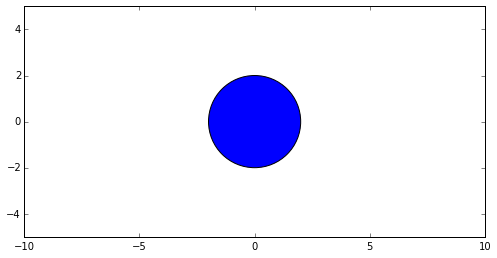

In [10]:
# Ipython2 code
interact(plot_circle,
         r = widgets.FloatTextWidget(value = 2, min = 1, max = 5),
         x0 = widgets.BoundedFloatTextWidget(value = 0, min = -5, max =  5),
         color = widgets.DropdownWidget(values = ['red','blue','green']) );

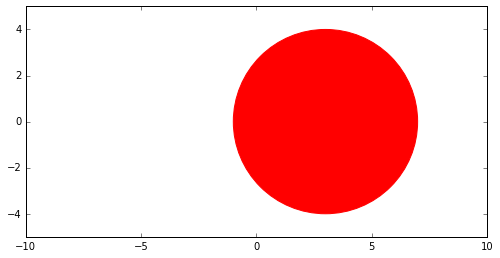

In [13]:
# Ipython3 code
interact(plot_circle,
         r = widgets.FloatText(value = 2, min = 1, max = 5),
         x0 = widgets.BoundedFloatText(value = 0, min = -5, max =  5),
         color = widgets.Dropdown(options = ['red','blue','green'], description = 'Color:') );

### *Widget Checkbox*
Dengan menggunakan penanda cek pada *widget checkbox* anda dapat menentukan apakah sebuah pernyataan adalah benar (`True`) atau salah (`False`). Pada contoh di bawah ini, *widget checkbox* digunakan agar *user* dapat secara interaktif menentukan apakah legenda untuk grafik perlu ditampilkan atau tidak.

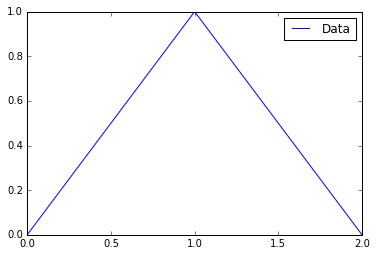

In [15]:
def plot_line(showlegend=True):
    plt.plot([0,1,2],[0,1,0],'b',label='Data')
    if showlegend: plt.legend(loc='best')
#IPython2 code
#interact(plot_line, showlegend=widgets.CheckboxWidget(value=True));
#IPython3 code
interact(plot_line, showlegend=widgets.Checkbox(value=True, description='Tampilkan legenda:'));

### Latihan 3
Bayangkan sebuah lapisan tanah dengan ketebalan 10 m. *Surcharge* pada lapisan permukaan tanah adalah $\sigma_0$. Muka air tanah terletak pada jarak $d$ di bawah lapisan permukaan tanah. Berat volumetrik dari tanah dalam kondisi kering adalah 16 kN/m$^3$ dan 20 kN/m$^3$ dalam kondisi *saturated*. Proses *capillary rise* dapat anda anggap tidak signifikan dalam contoh kasus ini. Buatlah sebuah fungsi untuk membuat plot dari variasi total *stress*$\sigma$, tekanan air $p$, dan efektif *stress* $\sigma'$ terhadap kedalaman tanah pada satu grafik yang sama. Sumbu vertikal mulai dari 0 dan mengarah ke bawah. Tambahkan label untuk masing-masing sumbu dan legenda ke dalam grafik tersebut. Atur agar kedalaman dari muka air tanah, $d$, dan besar *surcharge* pada permukaan tanah, $\sigma_0$, sebagai dua argumen input yang dibutuhkan untuk memanggil fungsi ini. Silakan lihat Bab 5 pada [Verruijt 2012](geo.verruijt.net/software/SoilMechBook2012.pdf) apabila anda butuh panduan untuk menghitung total *stress* pada lapisan tanah. Tambahkan sebuah *widget textbox* agar *user* dapat memasukkan nilai variabel $d$ (antara 0-10m) dan variabel $\sigma_0$ (antara 0-100 kN/m$^2$) secara interaktif ke dalam grafik.

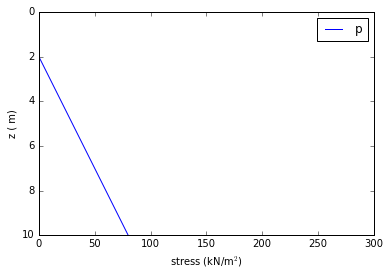

In [17]:
def soilstress(d=2, sig0=20, plotsig=True, plotsigp=True, plotp=True):
    gammadry = 16.0
    gammawet = 20.0
    gammawater = 10.0
    z = np.array([0,d,10])
    sig1 = sig0 + d*gammadry
    sig2 = sig1 + (10-d) * gammawet
    sig = np.array([sig0, sig1, sig2])
    p = np.array([0, 0, (10-d) * gammawater])
    sigp = sig - p
    if plotsig: plt.plot(sig, z, 'k', label=r"$\sigma$")
    if plotsigp: plt.plot(sigp, z, 'r', label=r"$\sigma'$")
    if plotp: plt.plot(p, z, 'b', label = 'p' )
    plt.ylim(10,0)
    plt.xlim(0,300)
    plt.xlabel('stress (kN/m$^2$)')
    plt.ylabel('z ( m)')
    plt.legend(loc='best')

interact(soilstress,
         d = widgets.BoundedFloatText(value = 2, min = 0, max =  10),
         sig0 = widgets.BoundedFloatText(value = 50, min = 0, max =  100),
         plotsig = widgets.Checkbox(value=True),
         plotsigp = widgets.Checkbox(value=True),
         plotp = widgets.Checkbox(value=True));

### Latihan 4
Variasi tahunan dari rata-rata harian temperatur tanah di berbagai kedalaman dapat dideskripsikan dengan menggunakan formula berikut:

 $$T(z,t) = T_m + \Delta T \exp(-2\pi z/\lambda) \cos[2\pi(t/t_0 - z/\lambda)]$$
 
 di mana $T(z,t)$ adalah temperatur pada kedalaman $z$ dan waktu $t$, $T_m$ adalah nilai rerata dari temperatur tahunan pada permukaan tanah, $\Delta T$ adalah amplitudo dari temperatur pada permukaan tanah, $t_0=365$ hari adalah periode penghitungan, dan $\lambda$ adalah panjang gelombang, yang didefinisikan sebagai:
 
 $$\lambda = 2\sqrt{t_0\pi\alpha}$$
 
 di mana $\alpha$ adalah difusivitas (atau keterbauran) tanah, yang besarannya dipengaruhi tingkat kandungan air di dalam tanah. Anda dapat menggunakan $\alpha=0.02-0.06$ m$^2$/hari pada contoh soal ini.
 
Buatlah sebuah fungsi yang dapat membuat plot dari temperatur tanah terhadap kedalaman tanah pada setiap 10 satuan waktu, yang berjarak simetris satu sama lain, dalam satu tahun. Letakkan temperatur tanah pada sumbu horizontal dan kedalaman tanah pada sumbu vertikal, di mana $z=0$ terletak pada permukaan tanah and nilai $z$ bertambah semakin ke bawah. Atur agar sumbu horizontal memiliki batas minimum $-5$ dan batas maksimum $+25$ derajat Celcius, serta 0-15m sebagai batas dari sumbu vertikal. Atur juga agar fungsi dapat dipanggil menggunakan dua buah argumen input; difusivitas tanah $\alpha$ dan aplitudo temperatur tahunan. Set agar *slider* untuk mengatur variabel difusivitas tanah memiliki batas 0.02 dan 0.06 m$^2$/hari. Atur agar amplitudo temperatur dapat diubah-ubah secara interaktif menggunakan teks selama nilai yang dimasukkan terletak di antara 5 sampai 15 derajat Celcius. Gunakan 10 derajat Celcius sebagai nilai rerata temperatur tahunan.

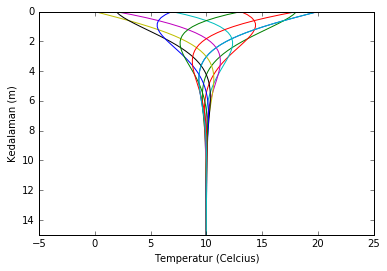

In [18]:
def plot_T(alpha=0.04,delT=10.0):
    Tm = 10
    t0 = 365.0
    z = np.linspace(0,20,100)
    lab = 2 * np.sqrt(t0*np.pi*alpha)
    plt.figure()
    for t in np.linspace(0,t0,11):
        T = Tm + delT * np.exp(-2*np.pi*z/lab) * np.cos(2*np.pi*(t/t0 - z/lab))
        plt.plot(T,z)
    plt.xlim(-5,25)
    plt.ylim(15,0)
    plt.xlabel('Temperatur (Celcius)')
    plt.ylabel('Kedalaman (m)')
interact(plot_T, 
         alpha=(0.02,0.06,0.001), 
         delT = widgets.BoundedFloatText(value = 10, min = 5, max =  15) );